In [47]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import itertools
import pylab

# 1.Data cleaning

In [7]:
carsdata=pd.read_csv('cars.csv')

In [8]:
carsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
#target variable
carsdata['selling_price'] = carsdata['selling_price'] / 1000  #change $ to 1k$

In [10]:
carsdata['age'] = 2020 - carsdata['year'] #Base year = 2020

In [11]:
carsdata['km_driven'] #looks good

0       145500
1       120000
2       140000
3       127000
4       120000
         ...  
8123    110000
8124    119000
8125    120000
8126     25000
8127     25000
Name: km_driven, Length: 8128, dtype: int64

In [12]:
carsdata['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [13]:
carsdata.drop(carsdata[carsdata['fuel'] == 'CNG'].index, axis= 0, inplace=True)
carsdata.drop(carsdata[carsdata['fuel'] == 'LPG'].index, axis= 0, inplace=True)
carsdata['fuel'].value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

In [14]:
carsdata['transmission'].value_counts()  #looks good

Manual       6983
Automatic    1050
Name: transmission, dtype: int64

In [15]:
carsdata['owner'].value_counts()  

First Owner             5238
Second Owner            2073
Third Owner              547
Fourth & Above Owner     170
Test Drive Car             5
Name: owner, dtype: int64

In [16]:
carsdata.drop(carsdata[carsdata['owner'] == 'Test Drive Car'].index, axis= 0, inplace=True)
carsdata['owner'] = carsdata['owner'].replace(['Third Owner', 'Fourth & Above Owner'], 'Third & Above Owner')
carsdata['owner'].value_counts() 

First Owner            5238
Second Owner           2073
Third & Above Owner     717
Name: owner, dtype: int64

In [17]:
carsdata['mileage'].value_counts()

18.9 kmpl     225
19.7 kmpl     173
18.6 kmpl     164
21.1 kmpl     157
17.0 kmpl     133
             ... 
16.38 kmpl      1
17.42 kmpl      1
18.24 kmpl      1
10.71 kmpl      1
16.51 kmpl      1
Name: mileage, Length: 366, dtype: int64

In [22]:
carsdata['mileage'].str.split(" ", expand = True)[0]

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: 0, Length: 8028, dtype: object

In [23]:
carsdata['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 8028, dtype: object

In [30]:
carsdata['mileage'] = carsdata['mileage'].str.split(" ", expand = True)[0]
carsdata['mileage']=pd.to_numeric(carsdata['mileage'])
carsdata['mileage'].describe()

count    7814.000000
mean       19.391962
std         4.001972
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [32]:
carsdata['engine'] = carsdata['engine'].str.split(" ", expand = True)[0]
carsdata['engine']=pd.to_numeric(carsdata['engine'])
carsdata['engine'].describe()

count    7814.000000
mean     1462.914640
std       504.759742
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

In [33]:
cars = carsdata[['selling_price', 'age', 'km_driven', 'mileage', 'engine', 'fuel', 'transmission', 'owner']].copy()

In [34]:
cars.isnull().sum()

selling_price      0
age                0
km_driven          0
mileage          214
engine           214
fuel               0
transmission       0
owner              0
dtype: int64

In [35]:
cars =cars.dropna()
cars.info()
cars.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7814 non-null   float64
 1   age            7814 non-null   int64  
 2   km_driven      7814 non-null   int64  
 3   mileage        7814 non-null   float64
 4   engine         7814 non-null   float64
 5   fuel           7814 non-null   object 
 6   transmission   7814 non-null   object 
 7   owner          7814 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 549.4+ KB


selling_price    0
age              0
km_driven        0
mileage          0
engine           0
fuel             0
transmission     0
owner            0
dtype: int64

In [36]:

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7814 non-null   float64
 1   age            7814 non-null   int64  
 2   km_driven      7814 non-null   int64  
 3   mileage        7814 non-null   float64
 4   engine         7814 non-null   float64
 5   fuel           7814 non-null   object 
 6   transmission   7814 non-null   object 
 7   owner          7814 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 549.4+ KB


cars.to_csv('cars.csv', index = False)

# 2. Test for multicollinearity

<AxesSubplot:>

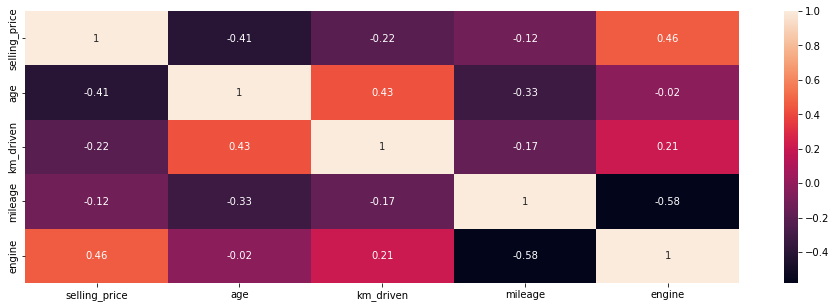

In [37]:
correlation_matrix = cars.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

In [38]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price ~ age + km_driven + mileage + engine + C(fuel) + C(transmission) + C(owner)', data=cars, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor                         features
0  204.827539                        Intercept
1    2.041134                C(fuel)[T.Petrol]
2    1.248729        C(transmission)[T.Manual]
3    1.260143         C(owner)[T.Second Owner]
4    1.271157  C(owner)[T.Third & Above Owner]
5    1.888147                              age
6    1.419133                        km_driven
7    2.600718                          mileage
8    3.293355                           engine


# 4. Test for normality of residuals

In [39]:
model =smf.ols('selling_price ~ age + km_driven + mileage + engine + C(fuel) + C(transmission) + C(owner)',data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1146.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:56:06   Log-Likelihood:                -60381.
No. Observations:                7814   AIC:                         1.208e+05
Df Residuals:                    7805   BIC:                         1.208e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         809.2082     88.956      9.097      0.000     634.831     983.585
C(fuel)[T.Petrol]                 -82.8002     17.850     -4.639      0.000    -117.790     -47.810
C(transmission)[T.Manual]        -988.9110     20.473    -48.303      0.000   -1029.043    -948.779
C(owner)[T.Second Owner]          -75.3567     16.020     -4.704      0.000    -106.761     -43.953
C(owner)[T.Third & Above Owner]   -18.0610     25.183     -0.717      0.473     -67.427      31.304
age                               -44.9575      2.210    -20.340      0.000     -49.290     -40.625
km_driven                          -0.0017      0.000    -12.870      0.000      -0.002      -0.001
mileage                            13.5979      2.505      5.429      0.000       8.688      18.508
engine                              0.6019      0.022     26.933      0.000       0.558       0.646
==============================================================================
Omnibus:                     5485.721   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143728.427
Skew:                           3.035   Prob(JB):                         0.00
Kurtosis:                      23.115   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

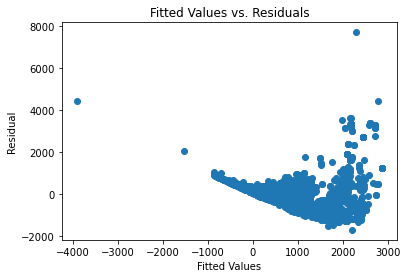

In [40]:
#Fitted Values vs. Residuals Plot
fitted = model.fittedvalues
res = model.resid
plt.scatter(fitted,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

(array([5.090e+02, 5.901e+03, 1.185e+03, 9.800e+01, 4.100e+01, 7.700e+01,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1697.65942535,  -757.64571343,   182.3679985 ,  1122.38171042,
         2062.39542234,  3002.40913427,  3942.42284619,  4882.43655812,
         5822.45027004,  6762.46398197,  7702.47769389]),
 <BarContainer object of 10 artists>)

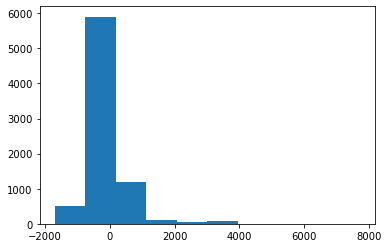

In [41]:
plt.hist(model.resid)

/Users/vishpra/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


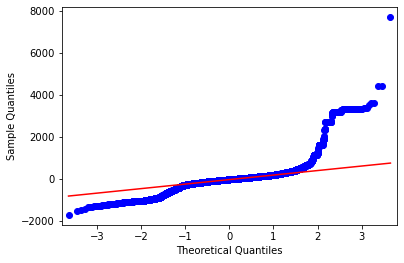

In [48]:
#QQ plot
sm.qqplot(model.resid,line='q')
pylab.show()

# 5. Test for influential points

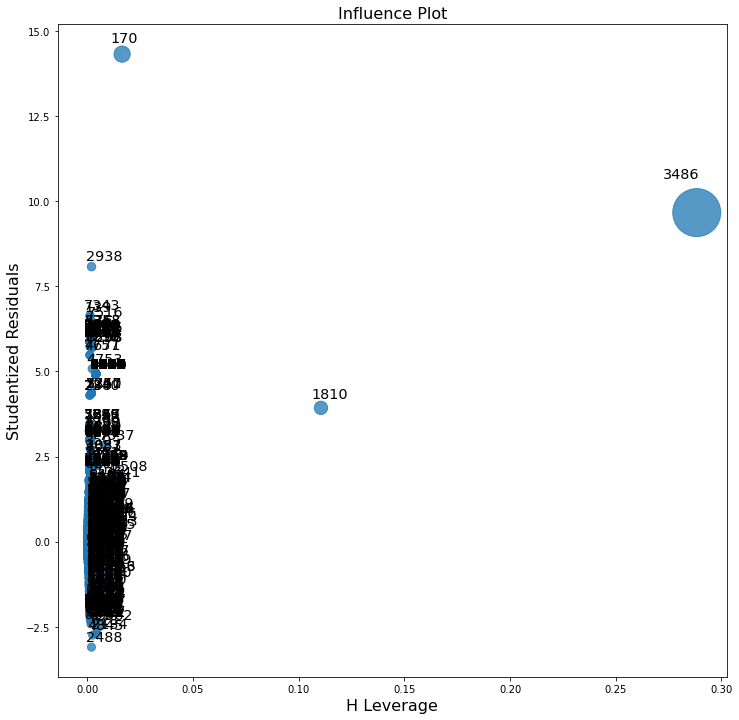

In [49]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 
#size of points are given by cook's dist value
#the points with big size and out of the (-3,3) should raise a flag

In [60]:
#threshold externally studentized residuals
import scipy
n=7814
p=8
inf = model.get_influence()
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
#detection - absolute value > threshold
reg_studs=inf.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud


print(len(reg_studs[atyp_stud]), cars.index[atyp_stud], reg_studs[atyp_stud])

318 Int64Index([ 105,  131,  132,  133,  134,  135,  136,  137,  139,  145,
            ...
            7860, 7862, 7872, 7873, 7924, 7930, 7952, 7976, 8052, 8057],
           dtype='int64', length=318) [-2.17525994  3.45012158  4.93311492  2.0673879   2.26039987  4.36526688
  6.22013999  2.94045188  6.6097532   2.34565921  5.97560232 -2.27678826
 14.31947488  4.30417408  2.69031247  4.93311492  2.0673879   2.98702554
  5.87582937  6.06225353  4.93311492  2.0673879   2.98702554  5.87582937
  6.06225353 -2.2271705  -2.2271705  -1.96163889 -1.97905057 -2.00328698
 -2.5831403   4.93311492  2.0673879   2.98702554  5.87582937  6.06225353
 -2.14827593 -2.1309524   2.54335818 -2.00967291 -2.15543083  6.01567722
  4.93311492  2.0673879   2.98702554  5.87582937  6.06225353  4.93311492
  2.0673879   2.98702554  5.87582937  6.06225353  4.93311492  2.0673879
  2.98702554  5.87582937  6.06225353  4.93311492  2.0673879   2.98702554
  5.87582937  6.06225353 -2.12325775 -2.31991535 -2.05324519 -2.1623

In [61]:
#Cook's distance
inflsum=inf.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(len(reg_cook[atyp_cook]), cars.index[atyp_cook],reg_cook[atyp_cook])

533 Int64Index([  69,  105,  131,  132,  133,  134,  135,  136,  137,  139,
            ...
            8003, 8025, 8030, 8042, 8045, 8052, 8057, 8081, 8086, 8115],
           dtype='int64', length=533) 69      0.000541
105     0.001061
131     0.001600
132     0.010863
133     0.000534
          ...   
8052    0.000817
8057    0.001124
8081    0.000568
8086    0.000566
8115    0.001160
Name: cooks_d, Length: 533, dtype: float64


In [62]:
#find the points shown in both list
intersection_set = set.intersection(set(cars.index[atyp_stud]), set(cars.index[atyp_cook]))
intersection_list = list(intersection_set)
print(len(intersection_list)) # Number of influential points

316


In [63]:
#drop influential points
data_new=cars.copy().drop(labels=intersection_list,axis=0)

In [64]:
model1 =smf.ols('selling_price ~ age + km_driven + mileage + engine + C(fuel) + C(transmission) + C(owner)',data=data_new).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1656.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:03:34   Log-Likelihood:                -52427.
No. Observations:                7498   AIC:                         1.049e+05
Df Residuals:                    7489   BIC:                         1.049e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1046.2915     46.459     22.521      0.000     955.218    1137.365
C(fuel)[T.Petrol]                -139.9225      9.309    -15.030      0.000    -158.171    -121.674
C(transmission)[T.Manual]        -522.3721     11.059    -47.233      0.000    -544.052    -500.693
C(owner)[T.Second Owner]          -48.7636      7.735     -6.304      0.000     -63.926     -33.601
C(owner)[T.Third & Above Owner]   -35.2061     12.198     -2.886      0.004     -59.118     -11.295
age                               -38.3176      1.103    -34.731      0.000     -40.480     -36.155
km_driven                          -0.0016   8.12e-05    -19.295      0.000      -0.002      -0.001
mileage                            -4.9583      1.293     -3.835      0.000      -7.492      -2.424
engine                              0.3380      0.012     28.588      0.000       0.315       0.361
==============================================================================
Omnibus:                     2403.289   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14144.996
Skew:                           1.409   Prob(JB):                         0.00
Kurtosis:                       9.110   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

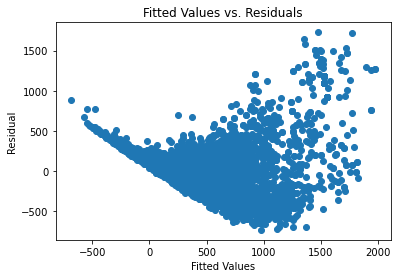

In [65]:
#Fitted Values vs. Residuals Plot
fitted = model1.fittedvalues
res = model1.resid
plt.scatter(fitted,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

# 6. Test for Heteroscedasticity

In [67]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model1.resid, model1.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 2382.553931940368, 'LM-Test p-value': 0.0}


In [68]:
model2 =smf.ols('np.log(selling_price) ~ age + km_driven + mileage + \
                 engine + C(fuel) + C(transmission) + C(owner)',data=cars).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(selling_price)   R-squared:                       0.802
Model:                               OLS   Adj. R-squared:                  0.802
Method:                    Least Squares   F-statistic:                     3956.
Date:                   Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                           00:04:34   Log-Likelihood:                -3273.7
No. Observations:                   7814   AIC:                             6565.
Df Residuals:                       7805   BIC:                             6628.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.3020      0.060    105.745      0.000       6.185       6.419
C(fuel)[T.Petrol]                  -0.1697      0.012    -14.190      0.000      -0.193      -0.146
C(transmission)[T.Manual]          -0.5628      0.014    -41.036      0.000      -0.590      -0.536
C(owner)[T.Second Owner]           -0.0874      0.011     -8.142      0.000      -0.108      -0.066
C(owner)[T.Third & Above Owner]    -0.1084      0.017     -6.427      0.000      -0.142      -0.075
age                                -0.1229      0.001    -82.967      0.000      -0.126      -0.120
km_driven                       -6.997e-07   8.72e-08     -8.022      0.000   -8.71e-07   -5.29e-07
mileage                             0.0083      0.002      4.933      0.000       0.005       0.012
engine                              0.0007    1.5e-05     46.426      0.000       0.001       0.001
==============================================================================
Omnibus:                      254.746   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.723
Skew:                          -0.211   Prob(JB):                    2.83e-117
Kurtosis:                       4.213   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

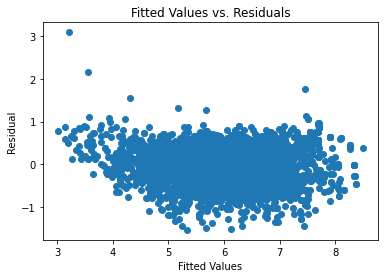

In [69]:
#Fitted Values vs. Residuals Plot
fitted = model2.fittedvalues
res = model2.resid
plt.scatter(fitted,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [70]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model2.resid, model2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 980.6327375666725, 'LM-Test p-value': 2.2607081765289463e-206}


/Users/vishpra/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


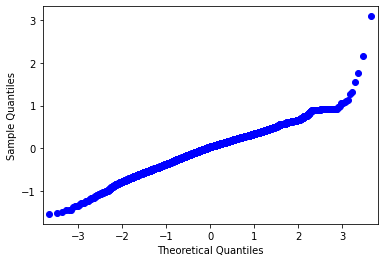

In [73]:
sm.qqplot(model2.resid)
pylab.show()

# 7. Model selection

### Finding candidate models using best subset approach

In [47]:
all_cols = list(cars.columns[1:])
all_cols

['age', 'km_driven', 'mileage', 'engine', 'fuel', 'transmission', 'owner']

In [48]:
all_cols[4] = 'C(fuel)'
all_cols[5] = 'C(transmission)'
all_cols[6] = 'C(owner)'

In [50]:
sub = [list(subset) for n in range(1,len(all_cols)+1) for subset in itertools.combinations(all_cols,n)]
len(sub)

127

In [51]:
sub

[['age'],
 ['km_driven'],
 ['mileage'],
 ['engine'],
 ['C(fuel)'],
 ['C(transmission)'],
 ['C(owner)'],
 ['age', 'km_driven'],
 ['age', 'mileage'],
 ['age', 'engine'],
 ['age', 'C(fuel)'],
 ['age', 'C(transmission)'],
 ['age', 'C(owner)'],
 ['km_driven', 'mileage'],
 ['km_driven', 'engine'],
 ['km_driven', 'C(fuel)'],
 ['km_driven', 'C(transmission)'],
 ['km_driven', 'C(owner)'],
 ['mileage', 'engine'],
 ['mileage', 'C(fuel)'],
 ['mileage', 'C(transmission)'],
 ['mileage', 'C(owner)'],
 ['engine', 'C(fuel)'],
 ['engine', 'C(transmission)'],
 ['engine', 'C(owner)'],
 ['C(fuel)', 'C(transmission)'],
 ['C(fuel)', 'C(owner)'],
 ['C(transmission)', 'C(owner)'],
 ['age', 'km_driven', 'mileage'],
 ['age', 'km_driven', 'engine'],
 ['age', 'km_driven', 'C(fuel)'],
 ['age', 'km_driven', 'C(transmission)'],
 ['age', 'km_driven', 'C(owner)'],
 ['age', 'mileage', 'engine'],
 ['age', 'mileage', 'C(fuel)'],
 ['age', 'mileage', 'C(transmission)'],
 ['age', 'mileage', 'C(owner)'],
 ['age', 'engine', 'C

In [52]:
iter = 1
for i,s in enumerate(sub):
    if len(s) != len(sub[i-1]) and i>1:
        iter = iter+1
        print(iter)
    print(i,s)

0 ['age']
1 ['km_driven']
2 ['mileage']
3 ['engine']
4 ['C(fuel)']
5 ['C(transmission)']
6 ['C(owner)']
2
7 ['age', 'km_driven']
8 ['age', 'mileage']
9 ['age', 'engine']
10 ['age', 'C(fuel)']
11 ['age', 'C(transmission)']
12 ['age', 'C(owner)']
13 ['km_driven', 'mileage']
14 ['km_driven', 'engine']
15 ['km_driven', 'C(fuel)']
16 ['km_driven', 'C(transmission)']
17 ['km_driven', 'C(owner)']
18 ['mileage', 'engine']
19 ['mileage', 'C(fuel)']
20 ['mileage', 'C(transmission)']
21 ['mileage', 'C(owner)']
22 ['engine', 'C(fuel)']
23 ['engine', 'C(transmission)']
24 ['engine', 'C(owner)']
25 ['C(fuel)', 'C(transmission)']
26 ['C(fuel)', 'C(owner)']
27 ['C(transmission)', 'C(owner)']
3
28 ['age', 'km_driven', 'mileage']
29 ['age', 'km_driven', 'engine']
30 ['age', 'km_driven', 'C(fuel)']
31 ['age', 'km_driven', 'C(transmission)']
32 ['age', 'km_driven', 'C(owner)']
33 ['age', 'mileage', 'engine']
34 ['age', 'mileage', 'C(fuel)']
35 ['age', 'mileage', 'C(transmission)']
36 ['age', 'mileage', 'C

In [53]:
models = {}
models['model']=[]
models['iter']=[]
models['adj_rsq'] = []
models['AIC']=[]
models['BIC']=[]
iter = 1
for i,s in enumerate(sub):
    if len(s) != len(sub[i-1]) and i>1:
        iter = iter+1
    models['iter'].append(iter)
    target = 'np.log(selling_price)~'
    exp = target
    exp = exp + '+ '.join(s)
    model = smf.ols(exp,data=cars).fit()
    models['model'].append(exp)
    models['adj_rsq'].append(model.rsquared_adj)
    y_sub = list(model.predict())
    models['AIC'].append(model.aic)
    models['BIC'].append(model.bic)

### Finding pool of candidate models from our complete set of all possible combinations

In [74]:
2**7 # Total possible choice of linear models using seven predictors 

128

In [59]:
df = pd.DataFrame(models)
df = df.rename({'iter':'predictors'},axis='columns')

df.sample(10).style

,model,predictors,adj_rsq,AIC,BIC
5,np.log(selling_price)~C(transmission),1,0.250937,16953.409540,16967.336884
115,np.log(selling_price)~km_driven+ mileage+ engine+ C(transmission)+ C(owner),5,0.625652,11538.333054,11587.078760
98,np.log(selling_price)~age+ km_driven+ mileage+ engine+ C(fuel),5,0.756650,8171.950020,8213.732054
89,np.log(selling_price)~km_driven+ engine+ C(fuel)+ C(transmission),4,0.512773,13595.656928,13630.475289
102,np.log(selling_price)~age+ km_driven+ mileage+ C(fuel)+ C(owner),5,0.674908,10435.956528,10484.702234
15,np.log(selling_price)~km_driven+ C(fuel),2,0.221363,17256.984031,17277.875048
51,np.log(selling_price)~km_driven+ C(fuel)+ C(owner),3,0.322745,16168.948068,16203.766429
91,np.log(selling_price)~km_driven+ engine+ C(transmission)+ C(owner),4,0.557200,12849.550075,12891.332108
1,np.log(selling_price)~km_driven,1,0.060602,18722.627458,18736.554802
105,np.log(selling_price)~age+ km_driven+ engine+ C(fuel)+ C(owner),5,0.758893,8100.599878,8149.345584


In [61]:
df.groupby(['predictors'],as_index=False).agg({'BIC':'min','AIC':'first','model':'first'})

,predictors,BIC,AIC,model
0,1,13895.844502,13881.917158,np.log(selling_price)~age
1,2,8440.152105,13827.785237,np.log(selling_price)~age+ km_driven
2,3,7079.199816,12525.958051,np.log(selling_price)~age+ km_driven+ mileage
3,4,6777.202442,8221.092023,np.log(selling_price)~age+ km_driven+ mileage+...
4,5,6697.365880,8171.950020,np.log(selling_price)~age+ km_driven+ mileage+...
5,6,6643.346474,6643.142644,np.log(selling_price)~age+ km_driven+ mileage+...
6,7,6627.985986,6565.312935,np.log(selling_price)~age+ km_driven+ mileage+...


#### Using BIC criteria

In [62]:
df_BIC = df.loc[df.groupby("predictors")["BIC"].idxmin()]
df_BIC.style

,model,predictors,adj_rsq,AIC,BIC
0,np.log(selling_price)~age,1,0.494399,13881.917158,13895.844502
9,np.log(selling_price)~age+ engine,2,0.748729,8419.261088,8440.152105
38,np.log(selling_price)~age+ engine+ C(transmission),3,0.789108,7051.345127,7079.199816
79,np.log(selling_price)~age+ engine+ C(fuel)+ C(transmission),4,0.797310,6742.384080,6777.202442
112,np.log(selling_price)~age+ engine+ C(fuel)+ C(transmission)+ C(owner),5,0.799779,6648.620175,6697.365880
123,np.log(selling_price)~age+ km_driven+ engine+ C(fuel)+ C(transmission)+ C(owner),6,0.801361,6587.637096,6643.346474
126,np.log(selling_price)~age+ km_driven+ mileage+ engine+ C(fuel)+ C(transmission)+ C(owner),7,0.801953,6565.312935,6627.985986


In [63]:
df_BIC[df_BIC['BIC'] == min(df_BIC['BIC'])]

,model,predictors,adj_rsq,AIC,BIC
126,np.log(selling_price)~age+ km_driven+ mileage+...,7,0.801953,6565.312935,6627.985986


#### Using AIC criteria

In [64]:
df_AIC = df.loc[df.groupby("predictors")["AIC"].idxmin()]
df_AIC.style

,model,predictors,adj_rsq,AIC,BIC
0,np.log(selling_price)~age,1,0.494399,13881.917158,13895.844502
9,np.log(selling_price)~age+ engine,2,0.748729,8419.261088,8440.152105
38,np.log(selling_price)~age+ engine+ C(transmission),3,0.789108,7051.345127,7079.199816
79,np.log(selling_price)~age+ engine+ C(fuel)+ C(transmission),4,0.797310,6742.384080,6777.202442
112,np.log(selling_price)~age+ engine+ C(fuel)+ C(transmission)+ C(owner),5,0.799779,6648.620175,6697.365880
123,np.log(selling_price)~age+ km_driven+ engine+ C(fuel)+ C(transmission)+ C(owner),6,0.801361,6587.637096,6643.346474
126,np.log(selling_price)~age+ km_driven+ mileage+ engine+ C(fuel)+ C(transmission)+ C(owner),7,0.801953,6565.312935,6627.985986


In [65]:
df_AIC[df_AIC['AIC'] == min(df_AIC['AIC'])]

,model,predictors,adj_rsq,AIC,BIC
126,np.log(selling_price)~age+ km_driven+ mileage+...,7,0.801953,6565.312935,6627.985986


#### Using Adjusted R square

In [71]:
df_r2 = df.loc[df.groupby("predictors")['adj_rsq'].idxmax()]
df_r2.style

,model,predictors,adj_rsq,AIC,BIC
0,np.log(selling_price)~age,1,0.494399,13881.917158,13895.844502
9,np.log(selling_price)~age+ engine,2,0.748729,8419.261088,8440.152105
38,np.log(selling_price)~age+ engine+ C(transmission),3,0.789108,7051.345127,7079.199816
79,np.log(selling_price)~age+ engine+ C(fuel)+ C(transmission),4,0.797310,6742.384080,6777.202442
112,np.log(selling_price)~age+ engine+ C(fuel)+ C(transmission)+ C(owner),5,0.799779,6648.620175,6697.365880
123,np.log(selling_price)~age+ km_driven+ engine+ C(fuel)+ C(transmission)+ C(owner),6,0.801361,6587.637096,6643.346474
126,np.log(selling_price)~age+ km_driven+ mileage+ engine+ C(fuel)+ C(transmission)+ C(owner),7,0.801953,6565.312935,6627.985986


In [69]:
df_r2.style

,model,predictors,adj_rsq,AIC,BIC
2,np.log(selling_price)~mileage,1,0.000966,19203.574441,19217.501785
13,np.log(selling_price)~km_driven+ mileage,2,0.066421,18675.073178,18695.964195
46,np.log(selling_price)~km_driven+ mileage+ C(owner),3,0.191167,17556.284868,17591.103229
87,np.log(selling_price)~km_driven+ mileage+ C(fuel)+ C(owner),4,0.351310,15833.219453,15875.001487
116,np.log(selling_price)~km_driven+ mileage+ C(fuel)+ C(transmission)+ C(owner),5,0.502933,13753.904951,13802.650657
125,np.log(selling_price)~km_driven+ mileage+ engine+ C(fuel)+ C(transmission)+ C(owner),6,0.627333,11504.163381,11559.872759
126,np.log(selling_price)~age+ km_driven+ mileage+ engine+ C(fuel)+ C(transmission)+ C(owner),7,0.801953,6565.312935,6627.985986


## FINAL MODEL OF CHOICE

In [67]:
df_r2[df_r2['adj_rsq'] == max(df_r2['adj_rsq'])]

,model,predictors,adj_rsq,AIC,BIC
126,np.log(selling_price)~age+ km_driven+ mileage+...,7,0.801953,6565.312935,6627.985986
